# Audio Data Conversion to Images + EDA

**The dataset**: To help with this, TensorFlow recently released the Speech Commands Datasets. It includes 65,000 one-second long utterances of 30 short words, by thousands of different people.


| dataset       | file count    | zipped space  | expanded space|
| ------------- | ------------- | ------------- | ------------- |
| train         | 64,727 files  | 1.1 GB        | 2.1 GB        |
| test          | 158,538 files | 2.6 GB        | 2.1 GB        |

**The Goal**: In this competition, you're challenged to use the Speech Commands Dataset to build an algorithm that understands simple spoken commands.

### About this Kernel
Hi all, if you are considering doing image recognition on these images, I've put together a starter kit that is designed to convert all the wav files into pictures with the goal of running image recognition on the source files. Hope the below is helpful!

**Version improvement 11-17-17**: swapped libraries to ```scipy``` instead of using ```soundfile```. It will run on kaggle kernel, but handicapped the actual file processing. Credit to https://www.kaggle.com/davids1992/data-visualization-and-investigation for the log_spectogram transformation.

**Initial Version improvement 11-16-17**: first submission, requires soundfile library

## 1. Load libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

## 2. Set your file path

In [2]:
audio_path = '../data/train/audio/'
pict_Path = '../data/picts/train/'
test_pict_Path = '../data/picts/test/'
test_audio_path = '../data/test/audio/'
samples = []

Kaggle Version: Identify all the subdirectories in the training directory**

In [3]:
subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)

Local Version: create local directories and identify subdirectories

In [4]:
if not os.path.exists(pict_Path):
    os.makedirs(pict_Path)

if not os.path.exists(test_pict_Path):
    os.makedirs(test_pict_Path)


subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)
        if not os.path.exists(pict_Path + '/' + x):
            os.makedirs(pict_Path +'/'+ x)

## 3. Pull an audio sample from each word

In [5]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))
print(total)

count: 2373 : two
count: 2364 : nine
count: 1746 : dog
count: 2357 : five
count: 2372 : four
count: 1746 : marvin
count: 2372 : go
count: 2369 : six
count: 1713 : bed
count: 2352 : eight
count: 1734 : sheila
count: 1733 : tree
count: 6 : _background_noise_
count: 2380 : stop
count: 1731 : bird
count: 2356 : three
count: 2377 : seven
count: 2376 : zero
count: 1745 : wow
count: 1750 : house
count: 2367 : right
count: 1733 : cat
count: 2375 : up
count: 2357 : off
count: 2353 : left
count: 1742 : happy
count: 2377 : yes
count: 2359 : down
count: 2370 : one
count: 2375 : no
count: 2367 : on
64727


## 4. Spectrograms

Sample File Path

In [6]:
sample_audio[0]

'../data/train/audio/two/fa7895de_nohash_0.wav'

### 4.1 Preview of Spectograms across different words

Borrowing log spec function from

https://www.kaggle.com/davids1992/data-visualization-and-investigation

In [7]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

Looking at the top 9 different words in Spectrogram format

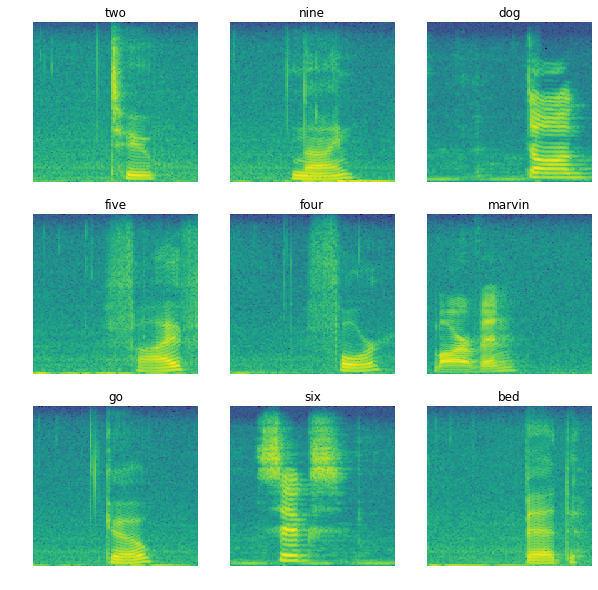

In [8]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

### 4.2 Spectograms within the same category, look at "five"

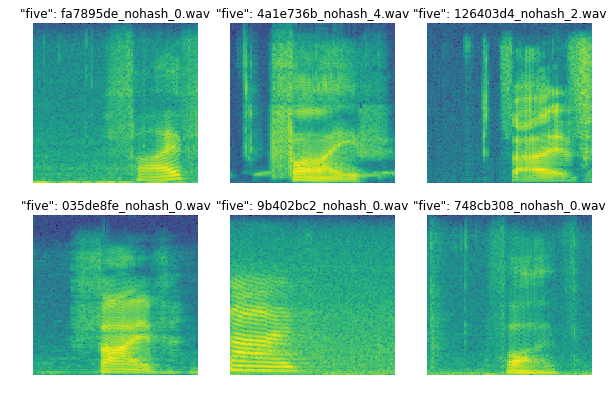

In [9]:
five_samples = [audio_path + 'five/' + y for y in os.listdir(audio_path + 'five/')[:6]]

fig = plt.figure(figsize=(10,10))

for i, filepath in enumerate(five_samples):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-1]
    plt.title('"five": '+label)
    
    # create spectogram
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

## 5 Waveforms

### 5.1 Waveforms across different Words

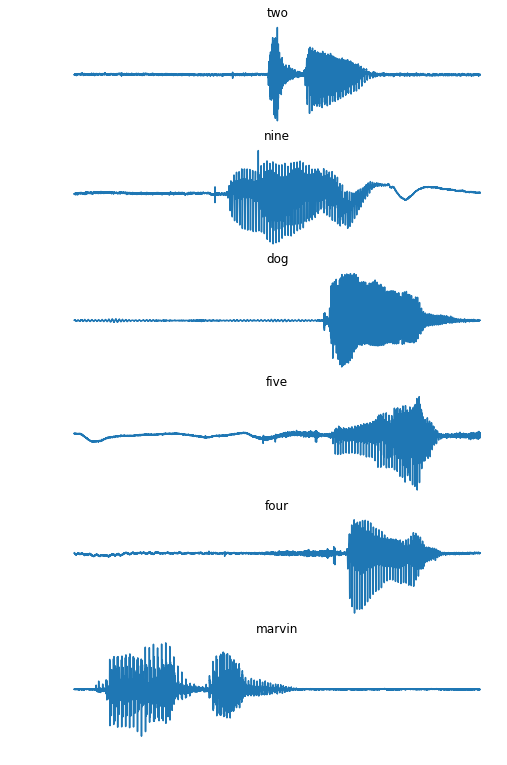

In [10]:
fig = plt.figure(figsize=(8,20))
for i, filepath in enumerate(sample_audio[:6]):
    plt.subplot(9,1,i+1)
    samplerate, test_sound  = wavfile.read(filepath)
    plt.title(filepath.split('/')[-2])
    plt.axis('off')
    plt.plot(test_sound)

### 5.2 Waveforms within the Same Word

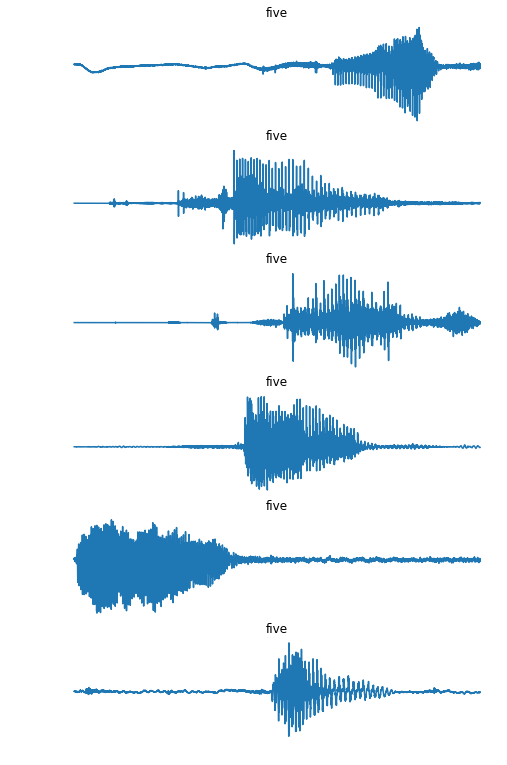

In [11]:
fig = plt.figure(figsize=(8,20))
for i, filepath in enumerate(five_samples):
    plt.subplot(9,1,i+1)
    samplerate, test_sound = wavfile.read(filepath)
    plt.title(filepath.split('/')[-2])
    plt.axis('off')
    plt.plot(test_sound)

## 6. Save Figures as images

Function: convert audio to spectogram images

In [12]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """

    fig = plt.figure(figsize=figsize)    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.imsave('%s.png' % output_file, spectrogram)
    plt.close()

Function: convert audio to waveform images

In [13]:
def wav2img_waveform(wav_path, targetdir='', figsize=(4,4)):
    samplerate,test_sound  = wavfile.read(sample_audio[0])
    fig = plt.figure(figsize=figsize)
    plt.plot(test_sound)
    plt.axis('off')
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    plt.savefig('%s.png' % output_file)
    plt.close()

### 6.1 Loops to iterate through directories and save

**These are 100% markdown to avoid running on the kaggle site.**

Copy and run locally in your instance. I've capped the number of folders and images to 3 and 5 respectively. Remove the list indexing to run through all directories and all images. Becareful, there's 64k training images!

**Convert Training Audio**

In [20]:
for i, x in enumerate(subFolderList[:3]):
    print(i, ':', x)
    # get all the wave files
    all_train_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_train_files[:10]:
        wav2img(audio_path + x + '/' + file, pict_Path + x)
        

0 : two
1 : nine
2 : dog


**Convert Testing Audio**

In [25]:
# get all the wave files
all_test_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
print(all_test_files)
for file in all_test_files:
    wav2img(test_audio_path + '/' + file, test_pict_Path)
    
# This cell takes a bit to execute...

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

<Figure size 288x288 with 0 Axes>